In [11]:
import pandas as pd
import seaborn as sns

# Test de Fisher

In [12]:
from scipy.stats import fisher_exact

In [13]:
data = pd.read_csv("/content/Données clients - Feuille 1_nettoyées.csv")

In [14]:
data.head()

,ID_Client,âge,genre,type de voyage,destination,saison de voyage,durée de voyage (en jours),nombre de personnes,prix total,mode de paiement,évaluation sur 5,date de début de voyage,date de fin de voyage,période de voyage,budget_voyage_annuel
0,1,32,M,culturel,Bali,été,10,2,4425,Virement,3,07-12-2023,09-12-2023,07-12-2023 au 09-12-2023,6407
1,2,38,Autre,détente,Népal,printemps,11,1,5743,Carte de crédit,2,01-09-2023,03-09-2023,01-09-2023 au 03-09-2023,4226
2,3,39,Autre,détente,Norvège,hiver,15,2,9565,Virement,3,22-02-2024,23-02-2024,22-02-2024 au 23-02-2024,5144
3,4,49,Autre,aventure,Japon,printemps,16,2,9833,Virement,2,31-08-2023,03-09-2023,31-08-2023 au 03-09-2023,4307
4,5,23,M,aventure,Islande,été,8,4,2358,Paypal,3,29-08-2023,01-09-2023,29-08-2023 au 01-09-2023,4348


In [15]:
contingency_table_fm = pd.crosstab(data['genre'], data['type de voyage'])
print(contingency_table_fm)

type de voyage  aventure  culturel  détente
genre                                      
Autre                111       178      108
F                     61        89       51
M                     60        97       42


In [16]:
data = data[data['genre'] != "Autre"]
data["type de voyage"] = data["type de voyage"].str.lower()

In [17]:
contingency_table_fm = pd.crosstab(data['genre'], data['type de voyage'])
print(contingency_table_fm)

type de voyage  aventure  culturel  détente
genre                                      
F                     61        89       51
M                     60        97       42


Ajouter histogramme comme dans le cours P2C4

<Axes: xlabel='type de voyage', ylabel='genre'>

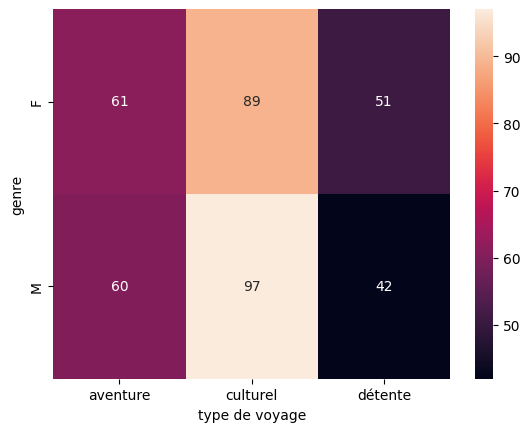

In [18]:
sns.heatmap(contingency_table_fm, annot=True)

In [19]:
contingency_table_2x2_fm = contingency_table_fm[['aventure', 'culturel']]
odds_ratio, p_value = fisher_exact(contingency_table_2x2_fm)
print(contingency_table_2x2_fm)

type de voyage  aventure  culturel
genre                             
F                     61        89
M                     60        97


In [20]:
print(f"Tableau de contingence 2x2:\n{contingency_table_2x2_fm}")
print(f"Odds Ratio: {odds_ratio}")
print(f"Valeur p: {p_value}")

Tableau de contingence 2x2:
type de voyage  aventure  culturel
genre                             
F                     61        89
M                     60        97
Odds Ratio: 1.108052434456929
Valeur p: 0.7261605285468693
